In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import matplotlib.gridspec as gridspec
from time import time

In [2]:
def k0(k2,gamma,t,X):
    if k2<gamma:
        v=X*((gamma-k2)/(1-np.exp(-(gamma-k2)*t)))
        return v
    elif k2==gamma:
        return X/t
    else:
        v=X*((k2-gamma)/(np.exp((k2-gamma)*t)-1))
        return v

In [4]:
def noise(k2):
    t=1
    gammax=1
    X=100
    num = np.exp(-t*(gammax+2*k2))*((np.exp(gammax*t)-np.exp(t*k2))**2)*(gammax*np.exp(gammax*t)+(gammax-2*k2)*np.exp(t*k2))
    den = 2*(t**2)*((gammax-k2)**3)*X
    return num/den

In [5]:
def margins(ax):
    ax.grid()
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1)
    for axis in ['top','right']:
        ax.spines[axis].set_linewidth(0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


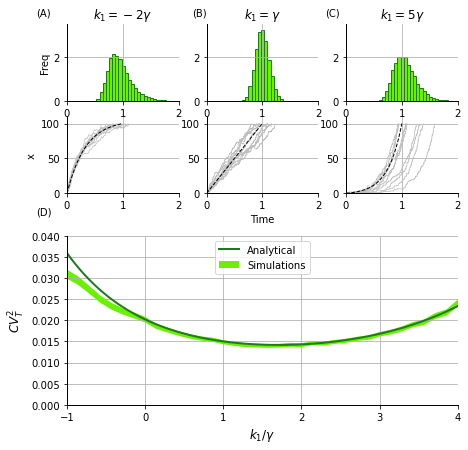

In [6]:
props2 = dict(boxstyle='round',facecolor= '#FFFFFF',linewidth=1,edgecolor='#AEAEAE')

df=pd.read_csv('./simextremespoisson.csv')
fig= plt.figure(figsize=(7,7))
gs0 = gridspec.GridSpec(2, 1, figure=fig,wspace=0.25,hspace=0.25)

gs00 = gridspec.GridSpecFromSubplotSpec(2, 3, subplot_spec=gs0[0],wspace=0.25)
ax = fig.add_subplot(gs00[0,0])
gammax=1
sigma=20
X=100

gammax=1
km=-2
dff=df[df.km==km]
ax.hist(dff.time,ec="#1f7a1f", fc="#6AF000",bins=np.linspace(0.3,2.5,40),density=True)
margins(ax)
ax.set_xlim([0,2])
ax.set_ylim([0,3.5])
ax.set_title('$k_1=-2\gamma$',fontsize=12)
ax.set_ylabel('Freq')


ax = fig.add_subplot(gs00[1,0])
ncells=10
k1=k0(k2=km,gamma=gammax,t=1,X=X)
for n in range(ncells):
    xarr=[]
    tarr=[]
    x=0

    t=0
    dt=0.01
    tt=0
    while x<X:
        r=np.random.rand()
        tau=np.min([-(1/(k1+km*x))*np.log(r),tt])
        react=np.argmin([-(1/(k1+km*x))*np.log(r),tt])
        x*=np.exp(-gammax*tau)
        t+=tau
        if react==0:
            x+=1
            tt+=-tau

        else:
            xarr.append(x)
            tarr.append(t)
            tt=dt
    ax.plot(tarr,xarr,c='#bebebe',lw=0.7)
margins(ax)  
ax.set_xlim([0,2])
ax.set_ylim([-0.1,110])
ax.set_ylabel('x')
xarr=np.linspace(0,1,100)
plt.plot(xarr,(k1/(gammax-km))*(1-np.exp(xarr*(km-gammax))),'k--',lw=1)


ax = fig.add_subplot(gs00[0,1])

km=gammax
dff=df[df.km==km]
ax.hist(dff.time,ec="#1f7a1f", fc="#6AF000",bins=np.linspace(0.3,2.5,40),density=True)
#ax.hist(tarr,ec="#0059b3", fc="#3399ff",bins=np.linspace(0.5,2,50))
margins(ax)
ax.set_xlim([0,2])
ax.set_ylim([0,3.5])
ax.set_title('$k_1=\gamma$',fontsize=12)

ax = fig.add_subplot(gs00[1,1])
ncells=10
k1=k0(k2=km,gamma=gammax,t=1,X=X)
for n in range(ncells):
    xarr=[]
    tarr=[]
    x=0

    t=0
    dt=0.001
    while x<X:
        r=np.random.rand()
        tau=np.min([-(1/(k1+km*x))*np.log(r),tt])
        react=np.argmin([-(1/(k1+km*x))*np.log(r),tt])
        x*=np.exp(-gammax*tau)
        t+=tau
        if react==0:
            x+=1
            tt+=-tau

        else:
            xarr.append(x)
            tarr.append(t)
            tt=dt
    ax.plot(tarr,xarr,c='#bebebe',lw=0.7)
margins(ax)
ax.set_xlim([0,2])
ax.set_ylim([-0.1,110])
xarr=np.linspace(0,1,100)
plt.plot(xarr,k1*xarr,'k--',lw=1)

ax.set_xlabel('Time')
sigma=20

ax = fig.add_subplot(gs00[0,2])
gammax=1
km=5
dff=df[df.km==km]
ax.hist(dff.time,ec="#1f7a1f", fc="#6AF000",bins=np.linspace(0.3,2.5,40),density=True)
#ax.hist(tarr,ec="#0059b3", fc="#3399ff",bins=np.linspace(0.5,2,50))
margins(ax)
ax.set_xlim([0,2])
ax.set_ylim([0,3.5])
ax.set_title('$k_1=5\gamma$',fontsize=12)
#ax.text()


ax = fig.add_subplot(gs00[1,2])
ncells=10
k1=k0(k2=km,gamma=gammax,t=1,X=X)
for n in range(ncells):
    xarr=[]
    tarr=[]
    x=0

    t=0
    dt=0.001
    while x<X:
        r=np.random.rand()
        tau=np.min([-(1/(k1+km*x))*np.log(r),tt])
        react=np.argmin([-(1/(k1+km*x))*np.log(r),tt])
        x*=np.exp(-gammax*tau)
        t+=tau
        if react==0:
            x+=1
            tt+=-tau

        else:
            xarr.append(x)
            tarr.append(t)
            tt=dt
    ax.plot(tarr,xarr,c='#bebebe',lw=0.7)
ax.set_xlim([0,2])
ax.set_ylim([-0.1,110])
margins(ax)
xarr=np.linspace(0,1,100)
plt.plot(xarr,(k1/(km-gammax))*(np.exp(xarr*(km-gammax))-1),'k--',lw=1)

ax = fig.add_subplot(gs0[1])

df=pd.read_csv('./fptvskm.csv')
#ax.plot(df.k2,df.cv2Sim,)
ax.fill_between(df.k2,df.cv2Sim-df.cv2err,df.cv2Sim+df.cv2err,
              edgecolor='#6AF000', facecolor='#6AF000',linewidth=0,label='Simulations')
ax.set_ylim(0,0.04)
ax.set_xlim([-1,4])
ax.set_ylabel('$CV^2_T$',fontsize=12)
ax.set_xlabel('$k_1/\gamma$',fontsize=12)
margins(ax)
ax.text(-1.4,0.092,'(A)')
ax.text(0.6,0.092,'(B)')
ax.text(2.3,0.092,'(C)')
ax.text(-1.4,0.045,'(D)')
x=np.linspace(-1,4,100)
plt.plot(x,noise(x),c="#1f7a1f",label='Analytical',lw=2)
plt.legend(fontsize=10,loc='upper center')
plt.savefig('./fig2.eps',bbox_inches='tight',dpi=600)

In [7]:
def noise(k2):
    sigma=5
    X=100
    gammax=1
    t=1
    num=(sigma**2)*(-2*np.sinh(t*(gammax-k2))+np.sinh(2*t*(gammax-k2)))
    den=(t**2)*((gammax-k2)**3)*X**2
    return num/den

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


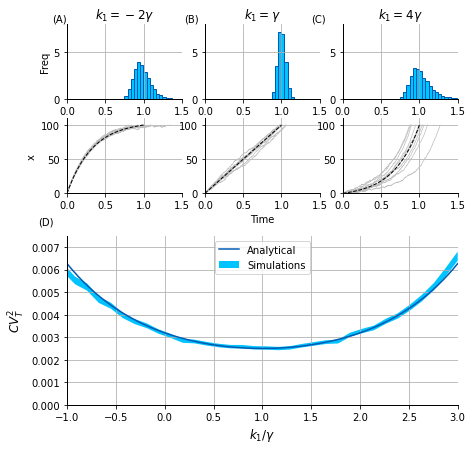

In [14]:
props2 = dict(boxstyle='round',facecolor= '#FFFFFF',linewidth=1,edgecolor='#AEAEAE')

df=pd.read_csv('./simextremesfp.csv')
fig= plt.figure(figsize=(7,7))
gs0 = gridspec.GridSpec(2, 1, figure=fig,wspace=0.25,hspace=0.25)

gs00 = gridspec.GridSpecFromSubplotSpec(2, 3, subplot_spec=gs0[0],wspace=0.2,hspace=0.25)
ax = fig.add_subplot(gs00[0,0])
gammax=1
sigma=5
X=100

gammax=1
km=-2
dff=df[df.km==km]
ax.hist(dff.time,ec="#0059b3", fc="#00C3FF",bins=np.linspace(0.5,1.7,30),density=True)
margins(ax)
ax.set_xlim([0,1.5])
ax.set_ylim([0,8])
ax.set_title('$k_1=-2\gamma$',fontsize=12)
ax.set_ylabel('Freq')


ax = fig.add_subplot(gs00[1,0])
ncells=10
k1=k0(k2=km,gamma=gammax,t=1,X=X)
for n in range(ncells):
    xarr=[]
    tarr=[]
    x=0

    t=0
    dt=0.001
    while x<X and t<300:
        x+=(k1+km*x-gammax*x)*dt+sigma*np.random.normal(scale=np.sqrt(dt))
        t+=dt
        xarr.append(x)
        tarr.append(t)
    ax.plot(np.array(tarr),xarr,c='#bebebe',lw=0.7)
margins(ax)  
ax.set_xlim([0,1.5])
ax.set_ylim([-0.1,110])
ax.set_ylabel('x')
xarr=np.linspace(0,1,100)
plt.plot(xarr,(k1/(gammax-km))*(1-np.exp(xarr*(km-gammax))),'k--',lw=1)


ax = fig.add_subplot(gs00[0,1])

km=gammax
dff=df[df.km==km]
ax.hist(dff.time,ec="#0059b3", fc="#00C3FF",bins=np.linspace(0.5,1.7,30),density=True)
#ax.hist(tarr,ec="#0059b3", fc="#00C3FF",bins=np.linspace(0.5,2,50))
margins(ax)
ax.set_xlim([0,1.5])
ax.set_ylim([0,8])
ax.set_title('$k_1=\gamma$',fontsize=12)

ax = fig.add_subplot(gs00[1,1])
ncells=10
k1=k0(k2=km,gamma=gammax,t=1,X=X)
for n in range(ncells):
    xarr=[]
    tarr=[]
    x=0

    t=0
    dt=0.001
    while x<X and t<300:
        x+=(k1+km*x-gammax*x)*dt+sigma*np.random.normal(scale=np.sqrt(dt))
        t+=dt
        xarr.append(x)
        tarr.append(t)
    ax.plot(tarr,xarr,c='#bebebe',lw=0.7)
margins(ax)
ax.set_xlim([0,1.5])
ax.set_ylim([-0.1,110])
xarr=np.linspace(0,1,100)
plt.plot(xarr,k1*xarr,'k--',lw=1)

ax.set_xlabel('Time')


ax = fig.add_subplot(gs00[0,2])
gammax=1
km=4
dff=df[df.km==km]
ax.hist(dff.time,ec="#0059b3", fc="#00C3FF",bins=np.linspace(0.5,1.7,30),density=True)
#ax.hist(tarr,ec="#0059b3", fc="#00C3FF",bins=np.linspace(0.5,2,50))
margins(ax)
ax.set_xlim([0,1.5])
ax.set_ylim([0,8])
ax.set_title('$k_1=4\gamma$',fontsize=12)
#ax.text()


ax = fig.add_subplot(gs00[1,2])
ncells=10
k1=k0(k2=km,gamma=gammax,t=1,X=X)
for n in range(ncells):
    xarr=[]
    tarr=[]
    x=0

    t=0
    dt=0.001
    while x<X and t<300:
        x+=(k1+km*x-gammax*x)*dt+sigma*np.random.normal(scale=np.sqrt(dt))
        t+=dt
        xarr.append(x)
        tarr.append(t)
    if t<20:
        ax.plot(tarr,xarr,c='#bebebe',lw=0.7)
ax.set_xlim([0,1.5])
ax.set_ylim([-0.1,110])
margins(ax)
xarr=np.linspace(0,1,100)
plt.plot(xarr,(k1/(km-gammax))*(np.exp(xarr*(km-gammax))-1),'k--',lw=1)

ax = fig.add_subplot(gs0[1])

df=pd.read_csv('./fptvskmfp.csv')
#ax.plot(df.k2,df.cv2Sim,c="#0059b3")
ax.fill_between(df.k2,df.cv2Sim-df.cv2err,df.cv2Sim+df.cv2err,
              edgecolor='#00C3FF', facecolor='#00C3FF',linewidth=0,label='Simulations')
ax.set_xlim(-1,3)
ax.set_ylabel('$CV^2_T$',fontsize=12)
ax.set_xlabel('$k_1/\gamma$',fontsize=12)
margins(ax)
ax.set_ylim([0,0.0075])
ax.text(-1.15,0.017,'(A)')
ax.text(0.2,0.017,'(B)')
ax.text(1.5,0.017,'(C)')
ax.text(-1.3,0.008,'(D)')
x=np.linspace(-2,3,100)
plt.plot(x,noise(x),c="#0059b3",label='Analytical')
plt.legend(fontsize=10,loc='upper center')
plt.savefig('./fig4.eps',bbox_inches='tight',dpi=600)

In [15]:
def k0(k2,gamma,t,X,x0):
    if k2<gamma:
        v=(X-x0*np.exp(-(gamma-k2)*t))*((gamma-k2)/(1-np.exp(-(gamma-k2)*t)))
        return v
        #return X*((gamma-k2)/(1-np.exp(-(gamma-k2)*t)))
    elif k2==gamma:
        return (X-x0)/t
    else:
        v=(X-x0*np.exp((k2-gamma)*t))*((k2-gamma)/(np.exp(-(gamma-k2)*t)-1))
        return v

In [19]:
def cv2t(k1,gamma,X,x0,T):
    num=x0*(np.exp((k1-gamma)*T)-1)
    den=T*(gamma-k1)*(X-x0)
    return num**2/den**2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


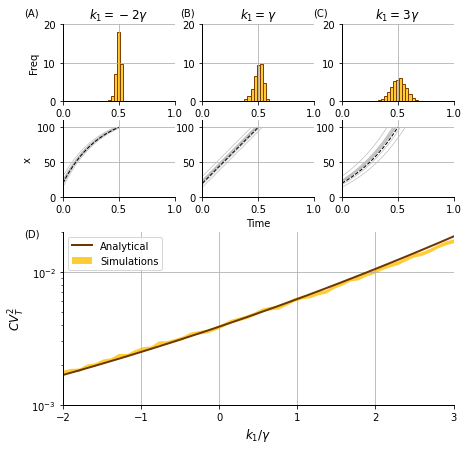

In [20]:
props2 = dict(boxstyle='round',facecolor= '#FFFFFF',linewidth=1,edgecolor='#AEAEAE')

df=pd.read_csv('./simextremesranx0.csv')
fig= plt.figure(figsize=(7,7))
gs0 = gridspec.GridSpec(2, 1, figure=fig,wspace=0.2,hspace=0.2)

gs00 = gridspec.GridSpecFromSubplotSpec(2, 3, subplot_spec=gs0[0],wspace=0.25,hspace=0.25)
ax = fig.add_subplot(gs00[0,0])
gammax=1
sigma=5
X=100

gammax=1
km=-2
dff=df[df.km==km]
ax.hist(dff.time,ec="#804000", fc="#FFCD33",bins=np.linspace(0.1,0.9,30),density=True)
margins(ax)
ax.set_xlim([0,1])
ax.set_ylim([0,20])
ax.set_title('$k_1=-2\gamma$',fontsize=12)
ax.set_ylabel('Freq')
ncells=10
x0arr=np.random.gamma(shape=10,scale=20*1/10,size=ncells)
ax = fig.add_subplot(gs00[1,0])

k1=k0(k2=km,gamma=gammax,t=0.5,X=X,x0=20)
for n in range(ncells):
    xarr=[]
    tarr=[]
    x=x0arr[n]

    t=0
    dt=0.001
    while x<X and t<300:
        x+=(k1+km*x-gammax*x)*dt
        t+=dt
        xarr.append(x)
        tarr.append(t)
    ax.plot(np.array(tarr),xarr,c='#bebebe',lw=0.7)
margins(ax)  
ax.set_xlim([0,1])
ax.set_ylim([-0.1,110])
ax.set_ylabel('x')
xarr=np.linspace(0,0.5,100)
plt.plot(xarr,20*np.exp(-(gammax-km)*xarr)+(k1/(gammax-km))*(1-np.exp(xarr*(km-gammax))),'k--',lw=1)


ax = fig.add_subplot(gs00[0,1])

km=gammax
dff=df[df.km==km]
ax.hist(dff.time,ec="#804000", fc="#FFCD33",bins=np.linspace(0.1,0.9,30),density=True)
#ax.hist(tarr,ec="#0059b3", fc="#3399ff",bins=np.linspace(0.5,2,50))
margins(ax)
ax.set_xlim([0,1])
ax.set_ylim([0,20])
ax.set_title('$k_1=\gamma$',fontsize=12)

ax = fig.add_subplot(gs00[1,1])
ncells=10
k1=k0(k2=km,gamma=gammax,t=0.5,X=X,x0=20)
for n in range(ncells):
    xarr=[]
    tarr=[]
    x=x0arr[n]

    t=0
    dt=0.001
    while x<X and t<300:
        x+=(k1+km*x-gammax*x)*dt
        t+=dt
        xarr.append(x)
        tarr.append(t)
    ax.plot(tarr,xarr,c='#bebebe',lw=0.7)
margins(ax)
ax.set_xlim([0,1])
ax.set_ylim([-0.1,110])
xarr=np.linspace(0,0.5,100)
plt.plot(xarr,20+k1*xarr,'k--',lw=1)

ax.set_xlabel('Time')


ax = fig.add_subplot(gs00[0,2])
gammax=1
km=3
dff=df[df.km==km]
ax.hist(dff.time,ec="#804000", fc="#FFCD33",bins=np.linspace(0.1,0.9,30),density=True)
#ax.hist(tarr,ec="#0059b3", fc="#3399ff",bins=np.linspace(0.5,2,50))
margins(ax)
ax.set_xlim([0,1])
ax.set_ylim([0,20])
ax.set_title('$k_1=3\gamma$',fontsize=12)
#ax.text()


ax = fig.add_subplot(gs00[1,2])
ncells=10
k1=k0(k2=km,gamma=gammax,t=0.5,X=X,x0=20)
for n in range(ncells):
    xarr=[]
    tarr=[]
    x=x0arr[n]

    t=0
    dt=0.001
    while x<X and t<300:
        x+=(k1+km*x-gammax*x)*dt
        t+=dt
        xarr.append(x)
        tarr.append(t)
    if t<20:
        ax.plot(tarr,xarr,c='#bebebe',lw=0.7)
ax.set_xlim([0,1])
ax.set_ylim([-0.1,110])
margins(ax)
xarr=np.linspace(0,0.5,100)
plt.plot(xarr,20*np.exp(-(gammax-km)*xarr)+(k1/(km-gammax))*(np.exp(xarr*(km-gammax))-1),'k--',lw=1)

ax = fig.add_subplot(gs0[1])

df=pd.read_csv('./fptvskmx0noisy.csv')

#ax.hist(dff.time,ec="#804000", fc="#cc6600",bins=np.linspace(0.1,0.9,30),density=True)
#ax.plot(df.k2,df.cv2Sim,c="#804000",label='Noisy Initial Concentration')
ax.fill_between(df.k2,df.cv2Sim-df.cv2err,df.cv2Sim+df.cv2err,
              edgecolor="#FFCD33", facecolor="#FFCD33",linewidth=0,label='Simulations')
#ax.plot(df.k2,df.cv2Sim,c="#0059b3")
#ax.fill_between(df.k2,df.cv2Sim-df.cv2err,df.cv2Sim+df.cv2err,
#              edgecolor='#3399ff', facecolor='#3399ff',linewidth=0,label='Simulations')
k2ar=np.array(df.k2)
plt.plot(k2ar,0.1*cv2t(k1=k2ar,gamma=1,X=100,x0=20,T=0.5),c="#6E3700",lw=2,label='Analytical')
plt.yscale('log')
ax.set_xlim(-2,3)
ax.set_ylim(0.001,0.02)
ax.set_ylabel('$CV^2_T$',fontsize=12)
ax.set_xlabel('$k_1/\gamma$',fontsize=12)
margins(ax)
#ax.set_ylim([0,0.0075])
ax.text(-2.5,0.85,'(A)')
ax.text(-0.5,0.85,'(B)')
ax.text(1.2,0.85,'(C)')
ax.text(-2.5,0.0185,'(D)')
ax.legend(fontsize=10)

plt.savefig('./fig6.eps',bbox_inches='tight',dpi=600)

In [21]:
def cv2t2(k1,gamma,X,x0,T):
    num=X*(np.exp(-(k1-gamma)*T)-1)
    den=T*(gamma-k1)*(X-x0)
    return num**2/den**2

0.5067823000000028


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


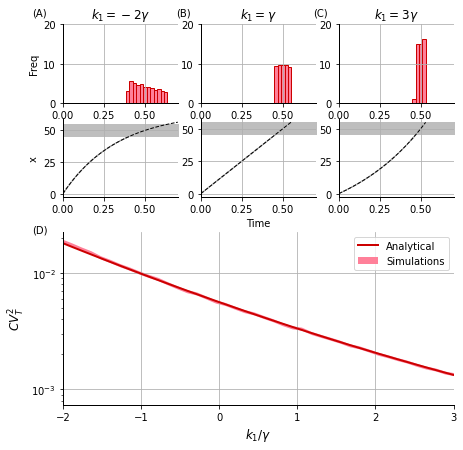

In [23]:
props2 = dict(boxstyle='round',facecolor= '#FFFFFF',linewidth=1,edgecolor='#AEAEAE')

df=pd.read_csv('./simextremesranx.csv')
fig= plt.figure(figsize=(7,7))
gs0 = gridspec.GridSpec(2, 1, figure=fig,wspace=0.2,hspace=0.2)

gs00 = gridspec.GridSpecFromSubplotSpec(2, 3, subplot_spec=gs0[0],wspace=0.2)
ax = fig.add_subplot(gs00[0,0])
gammax=1
sigma=5
X=50

gammax=1
km=-2
dff=df[df.km==km]
print(np.mean(dff.time))
ax.hist(dff.time-0.006,ec="#cc0000", fc="#FF8099",bins=np.linspace(0.3,0.7,20),density=True)
margins(ax)
ax.set_xlim([0,0.7])
ax.set_ylim([0,20])
ax.set_title('$k_1=-2\gamma$',fontsize=12)
ax.set_ylabel('Freq')


ax = fig.add_subplot(gs00[1,0])
ncells=10
k1=k0(k2=km,gamma=gammax,t=0.5,X=50,x0=0)
xcor=[]
ycor=[]
for n in range(ncells):
    xarr=[]
    tarr=[]
    x=0

    t=0
    dt=0.001
    X=np.random.uniform(low=45, high=55)
    while x<X and t<300:
        x+=(k1+km*x-gammax*x)*dt
        t+=dt
        xarr.append(x)
        tarr.append(t)
    ax.plot(np.array(tarr),xarr,c='#bebebe',lw=0.7)
    #plt.plot([0,1],[X,X],'k--',lw=0.5)

margins(ax)  
ax.set_xlim([0,0.7])
#ax.set_ylim([0,25])
ax.set_ylabel('x')
xarr=np.linspace(0,0.7,100)
plt.plot(xarr,0*np.exp(-(gammax-km)*xarr)+(k1/(gammax-km))*(1-np.exp(xarr*(km-gammax))),'k--',lw=1)
ax.fill_between([0,1],45,55,
              edgecolor='#bebebe', facecolor='#bebebe',linewidth=0)

ax = fig.add_subplot(gs00[0,1])

km=gammax
dff=df[df.km==km]
ax.hist(dff.time-0.02,ec="#cc0000", fc="#FF8099",bins=np.linspace(0.3,0.7,20),density=True)
#ax.hist(tarr,ec="#0059b3", fc="#3399ff",bins=np.linspace(0.5,2,50))
margins(ax)
ax.set_xlim([0,0.7])
ax.set_ylim([0,20])
ax.set_title('$k_1=\gamma$',fontsize=12)

ax = fig.add_subplot(gs00[1,1])
ncells=10
k1=k0(k2=km,gamma=gammax,t=0.5,X=50,x0=0)
for n in range(ncells):
    xarr=[]
    tarr=[]
    x=0

    t=0
    dt=0.001
    X=np.random.uniform(low=45, high=55)
    while x<X and t<300:
        x+=(k1+km*x-gammax*x)*dt
        t+=dt
        xarr.append(x)
        tarr.append(t)
    ax.plot(tarr,xarr,c='#bebebe',lw=0.7)
    #plt.plot([0,1],[X,X],'k--',lw=0.5)
margins(ax)
ax.set_xlim([0,0.7])
#ax.set_ylim([0,25])
xarr=np.linspace(0,0.55,100)
plt.plot(xarr,k1*xarr,'k--',lw=1)
ax.fill_between([0,1],45,55,
              edgecolor='#bebebe', facecolor='#bebebe',linewidth=0)
ax.set_xlabel('Time')


ax = fig.add_subplot(gs00[0,2])
gammax=1
km=3
dff=df[df.km==km]
ax.hist(dff.time-0.02,ec="#cc0000", fc="#FF8099",bins=np.linspace(0.3,0.7,20),density=True)
#ax.hist(tarr,ec="#0059b3", fc="#3399ff",bins=np.linspace(0.5,2,50))
margins(ax)
ax.set_xlim([0,0.7])
ax.set_ylim([0,20])
ax.set_title('$k_1=3\gamma$',fontsize=12)
#ax.text()


ax = fig.add_subplot(gs00[1,2])
ncells=10
k1=k0(k2=km,gamma=gammax,t=0.5,X=50,x0=0)
for n in range(ncells):
    xarr=[]
    tarr=[]
    x=0

    t=0
    dt=0.001
    X=np.random.uniform(low=45, high=55)
    while x<X and t<300:
        x+=(k1+km*x-gammax*x)*dt
        t+=dt
        xarr.append(x)
        tarr.append(t)
    if t<20:
        ax.plot(tarr,xarr,c='#bebebe',lw=0.7)
        #plt.plot([0,1],[X,X],'k--',lw=0.5)
    
ax.set_xlim([0,0.7])
#ax.set_ylim([0,25])
margins(ax)
xarr=np.linspace(0,0.53,100)
plt.plot(xarr,0*np.exp(-(gammax-km)*xarr)+(k1/(km-gammax))*(np.exp(xarr*(km-gammax))-1),'k--',lw=1)
ax.fill_between([0,1],45,55,
              edgecolor='#bebebe', facecolor='#bebebe',linewidth=0)
ax = fig.add_subplot(gs0[1])

df=pd.read_csv('./fptvskmxnoisy.csv')
#ax.plot(df.k2,df.cv2Sim,c='#cc0000',label='Noisy Threshold Concentration')
ax.fill_between(df.k2,df.cv2Sim-df.cv2err,df.cv2Sim+df.cv2err,
              edgecolor='#FF8099', facecolor='#FF8099',linewidth=0,label='Simulations')
k2ar=np.array(df.k2)
plt.plot(k2ar,(1/300)*cv2t2(k1=k2ar,gamma=1,X=50,x0=0,T=0.5),c="#cc0000",lw=2,label='Analytical')

#ax.hist(dff.time,ec="#804000", fc="#cc6600",bins=np.linspace(0.1,0.9,30),density=True)
#ax.plot(df.k2,df.cv2Sim,c="#804000",label='Noisy Initial Concentration')
#ax.fill_between(df.k2,df.cv2Sim-df.cv2err,df.cv2Sim+df.cv2err,
#              edgecolor="#cc6600", facecolor="#cc6600",linewidth=0)
#ax.plot(df.k2,df.cv2Sim,c="#0059b3")
#ax.fill_between(df.k2,df.cv2Sim-df.cv2err,df.cv2Sim+df.cv2err,
#              edgecolor='#3399ff', facecolor='#3399ff',linewidth=0,label='Simulations')
ax.set_xlim(-2,3)
ax.set_ylabel('$CV^2_T$',fontsize=12)
ax.set_xlabel('$k_1/\gamma$',fontsize=12)
margins(ax)
ax.set_yscale('log')
#ax.set_ylim([0,0.0075])
ax.text(-2.4,1.6,'(A)')
ax.text(-0.55,1.6,'(B)')
ax.text(1.2,1.6,'(C)')
ax.text(-2.4,0.022,'(D)')
ax.legend()


#x=np.linspace(-2,3,100)
#plt.plot(x,noise(x),c="#0059b3",label='Analytical')
#plt.legend(fontsize=10,loc='upper center')
plt.savefig('./fig7.eps',bbox_inches='tight',dpi=600)